In [57]:
%matplotlib widget

from modern_robotics import *
from BezierCurve import *
import matplotlib.pyplot as plt
import numpy as np
from pyScurveGenerator import *

In [58]:

pos_1 = [0,0,2]
pos_2 = [1,1,1]
pos_3 = [2,0,0]

X1 = np.eye(4)
X2 = np.eye(4)
X3 = np.eye(4)

X1[0:3,3] = pos_1
X2[0:3,3] = pos_2
X3[0:3,3] = pos_3

Tf = 5 #sec
N = 1000
traj1 = np.array(CartesianTrajectory(X1, X2, 5, 1000, 5));
traj2 = np.array(CartesianTrajectory(X2, X3, 5, 1000, 5));
traj = np.concatenate((traj1,traj2))

In [59]:
x_list = [x for x in traj[:,0,3]]
y_list = [y for y in traj[:,1,3]]
z_list = [z for z in traj[:,2,3]]


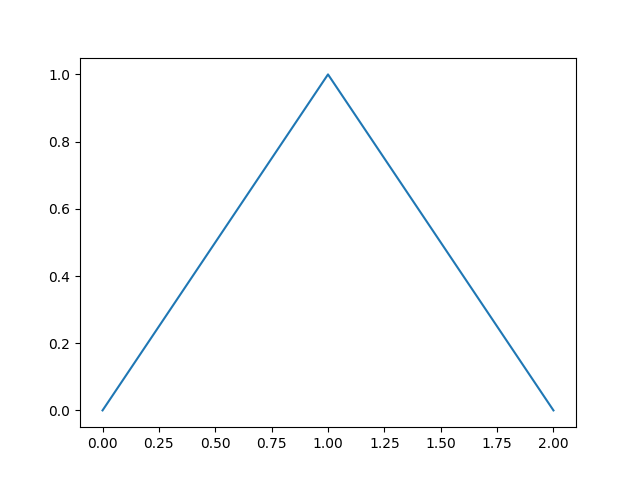

In [60]:
plt.plot(x_list,y_list)
plt.subplot(111)

plt.show()

In [61]:
Points = [pos_1,pos_2,pos_3]
weights = [1,2,1]
bc = BezierCurve(Points,weights,N)

In [62]:
P,P_prime,P_two_prime= bc.get_bazier_curve()

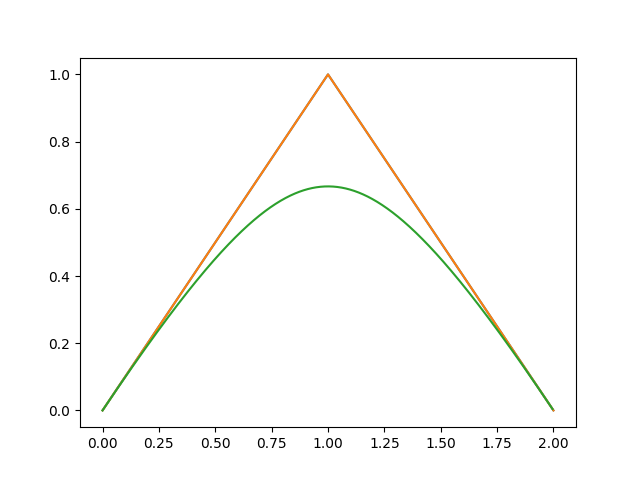

In [63]:
plt.plot(x_list,y_list)
plt.plot(P[:,0],P[:,1])
plt.show()

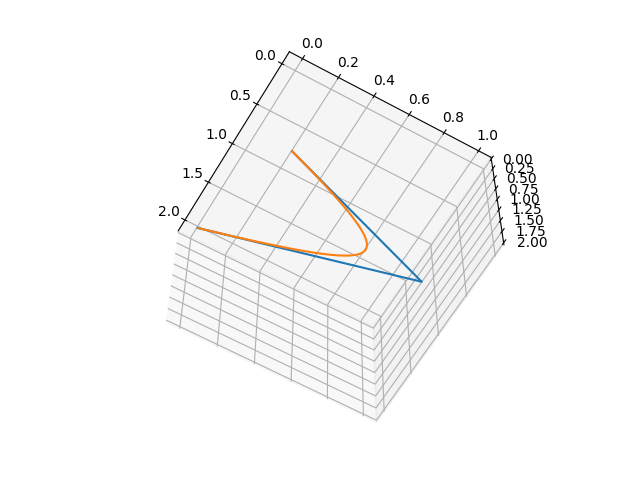

In [64]:
%matplotlib widget

from modern_robotics import *
from BezierCurve import *
import matplotlib.pyplot as plt
import numpy as np

ax3d = plt.subplot(111, projection="3d")
ax3d.plot(x_list,y_list,z_list)
ax3d.plot(P[:,0],P[:,1],P[:,2])
ax3d.view_init(120, 30)

In [65]:
def CartesianTrajectory(X_list,W_list,Tf,N):
    X_list = np.array(X_list)
    size_X=len(X_list);
    print(X_list.shape)
    N = int(N)
    timegap = Tf / (N - 1.0)
    traj = [[None]] * N
    R_list=[]
    p_list =[]
    for i in range(size_X):
        R, p = TransToRp(X_list[i,:,:])
        R_list.append(R)
        p_list.append(p)
    bc = BezierCurve(p_list,W_list,N)
    for i in range(N):
        s_traj = Trajectory();
        s_traj.vo = 0;
        s_traj.ao =0;
        s_traj.af = 0;
        s_traj.vf =0;
        s_traj.so =0;
        s_traj.sf = 1;
        s_traj.amax = 50;
        s_traj.dmax = 50;
        s_traj.vmax = 10;
        s_traj.j = 1000;
        sg = ScurveGenerator([s_traj])
        sg.syncTime();
        sg.syncTargetTime(Tf);
        s_traj = sg.getTraj(0);
        val = sg.generate(s_traj,timegap*i)
        s = val[0]
        sg.printAllTrajectory()
        #s = QuinticTimeScaling(Tf, timegap * i)
        P,dot_P,ddot_P = bc.get_bazier_curve_s(s);
        traj[i] \
        = np.r_[np.c_[np.array(np.eye(3)), \
                   np.array(P).T], \
                   [[0, 0, 0, 1]]]
        
    return np.array(traj)

In [66]:
X_list = [X1,X2,X3]
W_list = [1, 4,1]
traj = CartesianTrajectory(X_list,W_list,Tf,N)


(3, 4, 4)


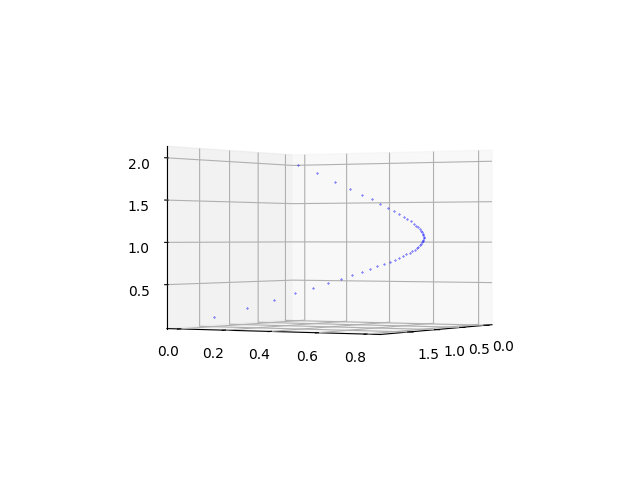

In [67]:
x_list = [x for x in traj[:,0,3]]
y_list = [y for y in traj[:,1,3]]
z_list = [z for z in traj[:,2,3]]
plt.clf()
ax3d = plt.subplot(111, projection="3d")
for i in range(0,len(x_list)-1,20):
    ax3d.scatter(x_list[i],y_list[i],z_list[i],s=0.1,c='b')
ax3d.view_init(0, 30)
plt.show()


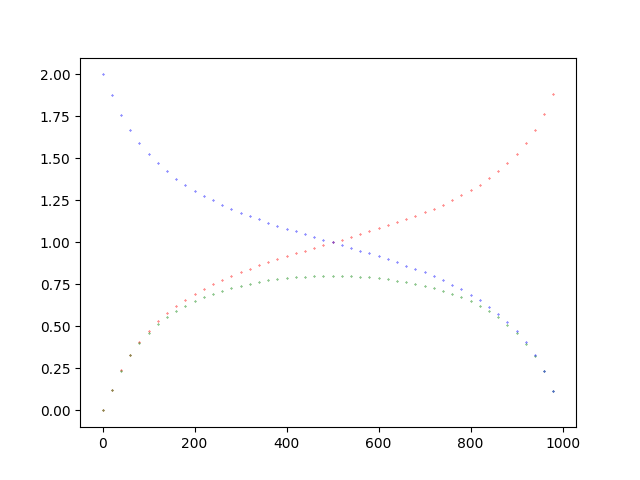

In [56]:
%matplotlib widget

from modern_robotics import *
from BezierCurve import *
import matplotlib.pyplot as plt
import numpy as np
from pyScurveGenerator import *
t_list = [i for i in range(0,len(x_list))]
for i in range(0,len(x_list)-1,20):
    plt.scatter(t_list[i],x_list[i],s=0.1,c='r')
    plt.scatter(t_list[i],y_list[i],s=0.1,c='g')
    plt.scatter(t_list[i],z_list[i],s=0.1,c='b')